{[Click here to read this notebook in Google Colab](https://colab.research.google.com/drive/1uKzd8EZwnK8xCF7Xd15zyE__HgIHnYOP)}

<head><link rel = "stylesheet" href = "https://drive.google.com/uc?id=1zYOH-_Mb9jOjRbQmghdhsmZ2g6xAwakk"></head>

<table class = "header"><tr>
    <th align = "left">EPAT Batch 45 | DMP 1, 2020\03\27</th>
    <th align = "right">Written by: Gaston Solari Loudet</th>
</tr></table>

### Backtesting with Python

We will need the Yahoo! Finance package tools. In case it is not installed in this Jupyter Notebook compiler (e.g.: Google Colab), it will be downloaded automatically.

In [51]:
import pip, sys, subprocess,  numpy, pandas, IPython, datetime, matplotlib.pyplot
# Install "yfinance" if not already done in this environment.
reqs = subprocess.check_output([sys.executable, '-m', 'pip', 'freeze'])
installed_libs = [r.decode().split('==')[0] for r in reqs.split()]
if "yfinance" not in installed_libs:  # Google Colab does not, by default.
    print("Yahoo! Finance library not yet installed. Downloading it...")
    subprocess.check_call([sys.executable, "-m", "pip", "install", "yfinance"])
# Now "yfinance" should be surely installed...
import yfinance

<u>**Yahoo! Finance data download**</u>

Market history data for Microsoft (MSFT) will be downloaded for exercises 1 to 4.

In [52]:
# Market data download:
date_0 = datetime.date(2013,  1,  1)
date_f = datetime.date(2018, 12, 31)
Data_raw = yfinance.download(tickers = "MSFT", start = date_0, end = date_f)
Data_raw.rename({"Adj Close": "Adj"}, inplace = True, axis = "columns")
Data_raw.reset_index(inplace = True)
# Set pixel height of output window
IPython.display.Javascript("google.colab.output.setIframeHeight('200px');")
pandas.set_option("display.max_rows", Data_raw.shape[0] + 1)
# Set custom matplotlib properties from Google Drive file.
matplotlib.pyplot.style.use("https://drive.google.com/uc?id=1TawPXELPzNlySaOx3HT67A-wHwRxuWjQ")

[*********************100%***********************]  1 of 1 completed


#### Set-up for exercises 1 and 2

Extra code for time display
*(Just to keep the record I've used in-lecture methods at least for once, for later reference.)*

In [53]:
# Set-up for exercises 1 and 2
SMA_Period = 200
# Using datetime (strftime)  to display start and end dates.
date_0_strftime = date_0.strftime("%A") + " " + date_0.strftime("%d") \
    + "'st of " + date_0.strftime("%B") + " of year " + date_0.strftime("%Y")
date_f_strftime = date_f.strftime("%A") + " " + date_f.strftime("%d") \
    + "'st of " + date_f.strftime("%B") + " of year " + date_f.strftime("%Y")
print("Historical price data spans...\n  ...from %s,\n    ...to %s."
      % (date_0_strftime, date_f_strftime))

# Using numpy (datetime64) to count dates in between.
date_0_numpy = numpy.datetime64(date_0)
date_f_numpy = numpy.datetime64(date_f)
dates_numpy  = numpy.arange(date_0_numpy, date_f_numpy,
                             dtype = "datetime64[D]")
n_days = len(dates_numpy)
print("\nThere are %d days between start and end date." % n_days)

Historical price data spans...
  ...from Tuesday 01'st of January of year 2013,
    ...to Monday 31'st of December of year 2018.

There are 2190 days between start and end date.


<u>**Set-up for graphic objects**</u>

Plotting tools for "``Data_raw``" dataframe. Upper sub-axes is for prices, lower sub-axes is for volume.
<br>I will use the object-oriented approach, to be able to have full control over graphic properties.

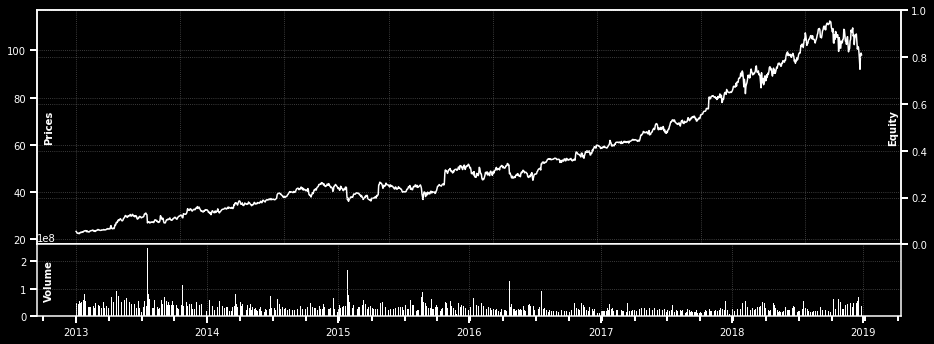

In [54]:
# Set properties for figure (graph container)
Figure_1 = matplotlib.pyplot.figure()
Figure_1.add_axes([0.10, 0.30, 0.80, 0.65])
matplotlib.pyplot.gca().twinx()
Figure_1.add_axes([0.10, 0.10, 0.80, 0.20])
for n, label in enumerate(["Prices", "Equity", "Volume"]):
    Figure_1.axes[n].set_ylabel(ylabel = label, color = "w", fontweight = "bold")
    Figure_1.axes[n].yaxis.set_label_coords(0.02, 0.5) # y-axis name position.
    Figure_1.axes[n].grid(b = True, color = "gray", linestyle = ":")  # Grid lines.
    
# Axes["Price"].tick_params(which = "x", colors = "black")
Figure_1.axes[0].plot(Data_raw.index, Data_raw["Adj"], color = "w")
Figure_1.axes[2].bar(Data_raw["Date"], Data_raw["Volume"], color = "w")
# Particular properties for secondary axes.
Figure_1.axes[1].yaxis.set_label_coords(0.985, 0.5)
matplotlib.pyplot.pause(1e-13)

<hr><hr><hr>

#### Exercise 1

> We had created a list called "``wealth``" in the modified Faber strategy. We also computed "``maWealth``". Use the method "``cumprod()``" from NumPy instead to get the same output. (<u>Hint</u>: You don't need to create "``maWealth``")

In [55]:
# Simple moving average calculation
Data_1 = Data_raw.copy()
SMA = Data_1["Adj"].rolling(window = SMA_Period, center = False)
# SMA column calculation
Data_1["SMA"] = SMA.mean()
IPython.display.display(Data_1.tail(3))

,Date,Open,High,Low,Close,Adj,Volume,SMA
1506,2018-12-26,95.139999,100.690002,93.959999,100.559998,98.312729,51634800,100.401767
1507,2018-12-27,99.300003,101.190002,96.400002,101.180000,98.918884,49498500,100.440583
1508,2018-12-28,102.089996,102.410004,99.519997,100.389999,98.146530,38196300,100.478240


<u>**Faber strategy procedure**</u>

<center><table class = "square">
    <tr><th width = "250">When...</th><th width = "550">And...</th><th width = "500">Trade?</th></tr>
    <tr><td>Price crosses above SMA</td>
    <td>There are no ongoing long trades</td>
    <td>Buy and hold the stock</td></tr>
    <tr><td>Price crosses below SMA</td>
    <td>There is an ongoing long trade</td>
    <td>Sell what has been bought</td></tr>
</table></center>

Example:
<center><img src = "https://d3q3936zlwc2ht.cloudfront.net/media/v1.0.0/filer_public/3d/d3/3dd31f86-17a4-468a-9c6b-a8df0a585463/39week-sma-signals.png" alt = "Fig. 1.1: Example of Faber strategy applied to S&P500 with a SMA of 200-day period"></center></ul>

In [56]:
# Strategy procedure with "for" cycle.
in_long = False # Flag. True when having bought.
for candle in range(SMA_Period - 1, len(Data_1) - 1):
    actual_price = Data_1["Adj"].iloc[candle]
    actual_date = Data_1.index[candle]
    actual_sma = Data_1["SMA"].iloc[candle]
    Data_1.at[actual_date, "in Long"] = in_long
    if (actual_price > actual_sma) and not in_long:
        buy_price = Data_1["Adj"].iloc[candle + 1]
        Data_1.at[actual_date, "Buy at"] = buy_price
        in_long = True
    if (actual_price < actual_sma) and in_long:
        sell_price = Data_1["Adj"].iloc[candle + 1]
        Data_1.at[actual_date, "Sell at"] = sell_price
        in_long = False
        Data_1.at[actual_date, "Return"] = sell_price/buy_price

IPython.display.display(Data_1.iloc[numpy.r_[0:3, -3:0]])

,Date,Open,High,Low,Close,Adj,Volume,SMA,in Long,Buy at,Sell at,Return
0,2013-01-02,27.250000,27.730000,27.150000,27.620001,23.241472,52899300,NaN,NaN,NaN,NaN,NaN
1,2013-01-03,27.629999,27.650000,27.160000,27.250000,22.930120,48294400,NaN,NaN,NaN,NaN,NaN
2,2013-01-04,27.270000,27.340000,26.730000,26.740000,22.500971,52521100,NaN,NaN,NaN,NaN,NaN
1506,2018-12-26,95.139999,100.690002,93.959999,100.559998,98.312729,51634800,100.401767,False,NaN,NaN,NaN
1507,2018-12-27,99.300003,101.190002,96.400002,101.180000,98.918884,49498500,100.440583,False,NaN,NaN,NaN
1508,2018-12-28,102.089996,102.410004,99.519997,100.389999,98.146530,38196300,100.478240,NaN,NaN,NaN,NaN


Create "``Equity``" (cumulative return) column in dataframe.
<br>Used "``cumprod()``" and NaNs with last valid value.

<u>**Strategy test and trades**</u>

On the next cell, it can be seen how the "``for``" cycle structures the trade. "``Buy at``" column registers the opening price only when the buying condition is confirmed, and same happens with selling. NaN values are a result of keeping the strategy idle until the trade exiting condition comes forth.

In [57]:
# Exercise 1 resolution with specified method; cumprod()
Data_1["Equity"] = Data_1["Return"].cumprod()
Data_1["Equity"].fillna(inplace = True, method = "ffill")
Data_1["Equity"].fillna(inplace = True, value = 1)
CGR = 100*float(Data_1["Equity"].iloc[-1] - 1)
print("Total number of trades: %d " % Data_1.count()["Buy at"])
print("Compound equity growth: %.2f%%" % CGR)

# Show first trade to check if dataframe structure is correct.
buy0 = Data_1[Data_1["Buy at"].notna()].index[0]
ret0 = Data_1[Data_1["Return"].notna()].index[0]
size = 8
test_rows = numpy.linspace(buy0, ret0, size).astype("int")
test_rows = numpy.insert(arr = test_rows, obj = [0, size],
                          values = [buy0 - 1, ret0 + 1])
test_columns = ["Date", "Adj", "SMA", "in Long",
            "Buy at", "Sell at", "Return", "Equity"]
print("Check %d rows from the first trade..." % size)
IPython.display.display(Data_1[test_columns].iloc[test_rows])

Total number of trades: 12 
Compound equity growth: 122.80%
Check 8 rows from the first trade...


,Date,Adj,SMA,in Long,Buy at,Sell at,Return,Equity
198,2013-10-15,29.675520,NaN,NaN,NaN,NaN,NaN,1.000000
199,2013-10-16,29.804571,26.719899,False,30.045486,NaN,NaN,1.000000
244,2013-12-19,31.426373,28.656519,True,NaN,NaN,NaN,1.000000
290,2014-02-27,33.068268,30.161119,True,NaN,NaN,NaN,1.000000
336,2014-05-05,34.439548,31.283953,True,NaN,NaN,NaN,1.000000
382,2014-07-10,36.670410,33.170528,True,NaN,NaN,NaN,1.000000
428,2014-09-15,40.926613,35.199582,True,NaN,NaN,NaN,1.000000
474,2014-11-18,43.411411,37.296273,True,NaN,NaN,NaN,1.000000
520,2015-01-27,37.996132,39.198030,True,NaN,36.68684,1.221043,1.221043
521,2015-01-28,36.686840,39.210227,False,NaN,NaN,NaN,1.221043


#### Plot graphs
* Adjusted close, in <font color = "Gray"><b>white</b></font>.
* SMA indicator, in <font color = "Fuchsia"><b>pink</b></font>.
* Equity curve, in <font color = "Lime"><b>green</b></font>.
* Volume, in lower bar chart.

Trading chart with equity curve.



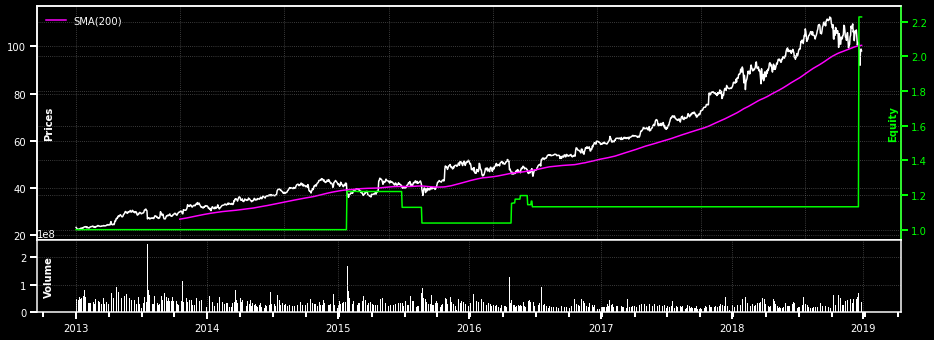

In [58]:
# Plot SMA curve in prices' axis.
Figure_1.axes[0].plot(Data_1.index, Data_1["SMA"], color = "fuchsia",
                                  label = "SMA(%d)" % SMA_Period)
Figure_1.axes[0].legend()
# Plot compound returns in secondary axis.
# Set all graph elements with same color.
Figure_1.axes[1].spines["right"].set_color("lime")  # y-axis lines
Figure_1.axes[1].tick_params(which = "both", colors = "lime") # y-axis numbers
Figure_1.axes[1].set_ylabel(ylabel = "Equity", color = "lime")
Figure_1.axes[1].plot(Data_1.index, Data_1["Equity"], color = "lime")
print("Trading chart with equity curve.\n")
Figure_1

<hr><hr><hr>

#### Exercise 2

> The modified Faber's strategy has been implemented using a "``for``" loop.
> <br>Code the same strategy using "``dataframe.apply()``" method.

I will take the freedom of coding a general-case function for quick-testing a *MA* crossover strategy. The moving average of a certain variable using "``period = 1``" is equal to the variable itself at all times. A **MA crossover** strategy with a short-term MA of "``period = 1``" would do the same as Faber's then. I do this in order to shorten the document as well as for the sake of Python training. The function will use the "``dataframe.apply()``" method as supposed to.

In [59]:
def MAC_strategy(Data, periods = (SMA_Period, 1), method = "compound",
                       is_ema = (False, False), tradeable = "both"):
    """
    Inputs: -> "Data":      DataFrame class instance from the Pandas' library.
            -> "periods":   Array with MA periods. Leftmost is long-term.
                            If len = 1, short-term MA will be just price.
                            ("SMA(x)" of period 1 is equal to "x" itself)
            -> "is_ema":    Array - True sets EMA (makes up for exercise 7).
            -> "tradeable": String implying which trade types can be taken.
                            -> "buy"/"long", "sell"/"short" or "both" (default)
            -> "method":    String for clarifying how to measure growth rate.
                            -> "sum" or "linear" for adding up returns,
                            -> "prod" or "compound" for multiplying them.
    
    Output: -> DataFrame with additional columns for strategy outcomes.   """

    """ -------------------------- Error check -------------------------- """

    # DataFrame error.
    if (Data is None) or (type(Data) != type(pandas.DataFrame())):
        raise ValueError("Argument has to be a Pandas' DataFrame.")
    # I tend to uppercase sometimes by mistake. Just in case:
    method = method.lower() ; tradeable = tradeable.lower()
    # String-property error.
    if method not in ["sum", "linear", "prod", "compound"]:
        raise ValueError("Method must be sum/linear or prod/compound.")
    if tradeable not in ["buy", "long", "sell", "short", "both"]:
        raise ValueError("Trades must be buy/long, sell/short or both.")

    """ ----------------------------- Setup ----------------------------- """

    # Select the rightmost float column in data for MA calc.
    # While downloading from yfinance, should be "Adj Close" by default.
    # I do this in case data is taken from a source with other column names.
    for column in Data.columns[::-1]:  # Read from right to left.
        if Data.dtypes[column] == "float64": break
    # Check if "periods" is array. Set short-term to 1 if not.
    try: period_L = periods[0]; period_S = periods[-1]
    except: period_L = periods; period_S = 1
    periods = (period_L, period_S)
    # Note that "period_L" does not necessarily need to be larger.
    # If smaller than "period_S", it would just invert the strategy signals.
    # Check if "is_ema" is array. Set short-term to False if not.
    try: is_ema_L = is_ema[0]; is_ema_S = is_ema[-1]
    except: is_ema_L = is_ema; is_ema_S = 1
    is_ema = (is_ema_L, is_ema_S)
    # Define which trades can be executed.
    do_long = tradeable in ["buy", "long", "both"] 
    do_short = tradeable in ["sell", "short", "both"] 

    # Create SMA object and column.
    lma = "L-%sMA(%d)" % ("E" if is_ema_L else "S", period_L)
    sma = "S-%sMA(%d)" % ("E" if is_ema_S else "S", period_S)
    Data[lma] = Data[column].ewm(span = period_L) if is_ema_L else \
                Data[column].rolling(window = period_L).mean()
    Data[sma] = Data[column].ewm(span = period_S) if is_ema_S else \
                Data[column].rolling(window = period_S).mean()

    """ --------------------------- Strategy --------------------------- """

    # Trend flags. Trend can't be defined if "row < max period"
    Flags = pandas.DataFrame()      # rows start from 0
    Flags["is Valid"] = (Data.index >= max(periods) - 1) 
    Flags["is Bull"] = (Data[sma] > Data[lma]) & Flags["is Valid"]
    Flags["was Bull"] = Flags["is Bull"].shift(1, fill_value = False)
    Flags["is Bear"] = (Data[sma] < Data[lma]) & Flags["is Valid"]
    Flags["was Bear"] = Flags["is Bear"].shift(1, fill_value = False)

    # Trading flags. Trend change triggers execution. Using "apply()" method.
    Flags["go Long"] = Flags.apply(axis = "columns", func = lambda x:
                            (x["is Bull"] & ~x["was Bull"]) & x["is Valid"])
    Flags["go Short"] = Flags.apply(axis = "columns", func = lambda x:
                            (x["is Bear"] & ~x["was Bear"]) & x["is Valid"])
    # Holding flags. Trade is kept ongoing until trend changes.
    # "in Long"/"in Short" rows are False if "can_long"/"can_short" = False".
    Flags["in Long"] = (Flags["is Bull"] | Flags["was Bull"]) & do_long
    Flags["in Short"] = (Flags["is Bear"] | Flags["was Bear"]) & do_short

    # Long entry price: set when trend goes from bear to bull. With "apply()".
    Data["Buy at"] = Flags.apply(axis = "columns", func = lambda x:
                          1 if x["go Long"] else 0 if x["in Long"]
                          else None)*Data[column].shift(-1)
    # Short entry price: set when trend goes from bull to bear. With "apply()".
    Data["Sell at"] = Flags.apply(axis = "columns", func = lambda x:
                          1 if x["go Short"] else 0 if x["in Short"] 
                          else None)*Data[column].shift(-1)
    # Replicate entry prices towards all involved rows.
    if do_long: Data["Buy at"].replace(0, method = "ffill", inplace = True)
    else:        Data["Buy at"].replace(0, value = numpy.nan, inplace = True)
    if do_short: Data["Sell at"].replace(0, method = "ffill", inplace = True)
    else:         Data["Sell at"].replace(0, value = numpy.nan, inplace = True)

    """ ---------------------------- Output ---------------------------- """

    # Returns, depending on method.
    inv = (-1)**Flags["in Short"] # in long: "ret = S/B", in short: "ret = B/S"
    if (method == "sum" or method == "linear"):
        Data["Return"] = (Data["Sell at"]/Data["Buy at"])**inv - 1
        Data["Equity"] = Data["Return"].fillna(value = 0).cumsum()  # x + 0 = 0
    if (method == "prod" or method == "compound"):
        Data["Return"] = (Data["Sell at"]/Data["Buy at"])**inv
        Data["Equity"] = Data["Return"].fillna(value = 1).cumprod() # x * 1 = 1
    return

<u>**Strategy test with function**</u>

Now, let's compare dataframes from both exercises <u>in their trade exit rows</u>.
<br><u>**Important**</u>: "``Buy at``" rows in "``Data_1``" dataframe from exercise 1 will display NaNs in the cell output below.
* Exercise 2 needs replication of buy prices towards rows involved in trade (line 88) to calculate returns (line 98).
* Exercise 1 and its "``for``" cycle can calculate them without it, however. So it doesn't extend buy prices downwards.

In [60]:
# Compare trades between dataframes from exercise 1 and 2.
Data_2 = Data_raw.copy() # Copy without modifying original.
MAC_strategy(Data_2, tradeable = "buy")
test_columns = ["Buy at", "Sell at", "Return", "Equity"]
print("\nDataframe from exercise 1...\n(Sequential - 'for' cycle):\n")
IPython.display.display(Data_1[test_columns].loc[Data_1["Return"].notna()])
print("\nDataframe from exercise 2...\n(Function with '.apply()'):\n")
IPython.display.display(Data_2[test_columns].loc[Data_1["Return"].notna()])


Dataframe from exercise 1...
(Sequential - 'for' cycle):



,Buy at,Sell at,Return,Equity
520,NaN,36.686840,1.221043,1.221043
540,NaN,39.522354,0.999320,1.220213
626,NaN,39.860466,0.925191,1.128930
664,NaN,37.878582,0.919659,1.038231
836,NaN,45.954697,1.109647,1.152069
839,NaN,45.954697,1.001808,1.154152
843,NaN,47.014420,1.018973,1.176050
853,NaN,47.872185,1.017646,1.196803
867,NaN,46.239010,0.956063,1.144219
874,NaN,48.169113,1.018043,1.164864



Dataframe from exercise 2...
(Function with '.apply()'):



,Buy at,Sell at,Return,Equity
520,30.045486,36.686840,1.221043,1.221043
540,39.549263,39.522354,0.999320,1.220213
626,43.083488,39.860466,0.925191,1.128930
664,41.187630,37.878582,0.919659,1.038231
836,41.413811,45.954697,1.109647,1.152069
839,45.871765,45.954697,1.001808,1.154152
843,46.139008,47.014420,1.018973,1.176050
853,47.042061,47.872185,1.017646,1.196803
867,48.363979,46.239010,0.956063,1.144219
874,47.315422,48.169113,1.018043,1.164864


(Note that except from the NaNs along the "``Buy at``" column in the 1st exercise, results are identical regardless of the chosen MA period.)

<hr><hr><hr>

#### Exercise 3

> Write a customized function that computes returns for the modified Faber's strategy for different moving average durations. Try out different combinations to find one which is better than buy-and-hold for the required equity.

A possible approach for this task would be to run the "``MAC_strategy()``" function defined in exercise 2. It shall be executed iteratively over a couple of MA period arrays. Within each pair, a 2D grid takes each final result. Results can be either final equity value, or hit ratio depending on "``metric``" parameter.

In [61]:
# Exercise 3 resolution. Default periods range go 20 by 20 towards 200.
def MAC_compare(Data, periods = numpy.arange(start = 1, stop = 11)*20,
                      is_ema = [False, False], tradeable = "both", 
                      method = "compound", metric = "equity"):
    """
    Inputs: -> "Data":      DataFrame class instance from the Pandas' library.
            -> "periods":   Numpy array of shape "2 x N". Each row must be a
                            series of testing periods. Left-most is long-term.
            -> "is_ema":    Array, same purpose as in "MAC_strategy" function.
            -> "tradeable": String, same purpose as in "MAC_strategy" function.
            -> "method":    String, same purpose as in "MAC_strategy" function.
            -> "metric":    String, specifies which performance metric should
                            compare ("equity" or "hit ratio").
    
    Output: -> DataFrame. Grid where each row/column is a long-term/short-term 
                          MA periods' combination, and its corresponding cell
                          value is its MAC strategy's resulting metric value.
    """
    """ -------------------------- Error check -------------------------- """

    # Most applicable errors are already covered by "MAC_strategy" def.

    """ ----------------------------- Setup ----------------------------- """

    # Create log-like table. It will later be turned into a pivot/grid.
    Log = pandas.DataFrame(columns = ["LMA", "SMA", "Result"])
    # Stop if periods' array is not a numpy array.
    if (type(periods) is not numpy.ndarray) or (periods.size == 0):
        raise ValueError("'Periods' array must be numpy-type, and non-empty.")
    if periods.ndim < 2:       # When short-term MAs are specified,
        periods_L = periods          # Specified MAs are long-term.
        periods_S = numpy.array([1]) # Just use MA(1) = Price itself.
    else:
        periods_L = periods[0]     # Leftmost column
        periods_S = periods[-1]    # Rightmost column
    
    """ --------------------------- Procedure --------------------------- """

    # Cycle through all testing periods.
    for period_L in periods_L:
        # Omit zero or negative periods.
        if period_L < 1: continue
        for period_S in periods_S:
        # Omit zero or negative periods.
            if period_S < 1: continue
            # Get couple of periods for each test.
            pair = (period_L, period_S)
            # Do not change original dataframe.
            MAC = Data.copy()
            # Execute MAC strategy test. Leave original dataframe intact.
            MAC_strategy(MAC, periods = pair, is_ema = is_ema, 
                            tradeable = tradeable, method = method)
            # Retrieve result value.
            result = MAC.iloc[-1, -1]
            if metric == "hit ratio":
                # 1 if compound, 0 if linear. 
                null = method.lower() in ["prod", "compound"]
                t_pos = MAC["Return"][MAC["Return"] > 1*null].count()
                t_neg = MAC["Return"][MAC["Return"] < 1*null].count()
                result = t_pos/(t_pos + t_neg)
            # Append results to log dataframe.
            Log = Log.append(other = {"LMA": pair[0], "SMA": pair[1],
                                      "Metric": result}, ignore_index = True)
    # Convert log to grid.
    return pandas.pivot_table(data = Log, values = "Metric",
                             index = "LMA", columns = "SMA")

<u>**"Final equity" vs "MA period"**</u>

Testing interval periods from 20 to 200.<br>
Behavior is clearly better for longer periods.

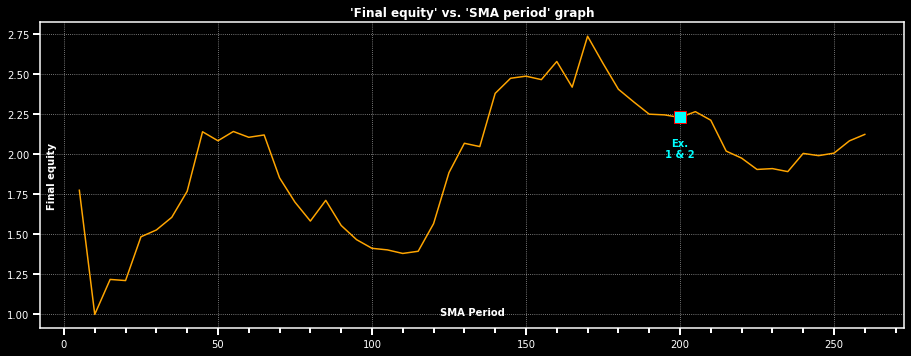

In [62]:
# Test function.
metric = "equity"
Grid = MAC_compare(Data_raw, method = "prod", tradeable = "buy", metric = metric, periods = numpy.r_[5:261:5])

# Set properties for figure (graph container)
Figure_3 = matplotlib.pyplot.figure()
Figure_3.add_axes([0.10, 0.05, 0.80, 0.85])
Figure_3.axes[0].set_xlabel(xlabel = "SMA Period", fontweight = "bold")
Figure_3.axes[0].set_ylabel(ylabel = f"Final {metric}", fontweight = "bold")
Figure_3.axes[0].xaxis.set_label_coords(0.5, 0.07)   # x-axis name position.
Figure_3.axes[0].yaxis.set_label_coords(0.02, 0.5)   # y-axis name position.
Figure_3.axes[0].plot(Grid.index, Grid[1], color = "orange")
Figure_3.axes[0].plot(SMA_Period, 1 + CGR/100, marker = "s", markerfacecolor = "cyan", markersize = 12)
Figure_3.axes[0].text(SMA_Period, 1 + CGR/100 - 0.25, "Ex.\n1 & 2", fontweight = "bold", ha = "center", color = "cyan")
Figure_3.axes[0].set_title(f"'Final {metric}' vs. 'SMA period' graph", fontweight = "bold")
matplotlib.pyplot.pause(1e-13)

<hr><hr><hr>

#### Exercise 4

> The moving average crossover (MAC) code is implemented where we always have an open position. Calculate returns where short selling is not allowed. Plot a graph comparing returns from buy-and-hold, no short selling, and the one we did in class. Comment on your results.

Having defined a general-purpose "``MAC_strategy()``" function, this can be done comparing, for different ranges of MA periods, the final equity value when shorting is allowed, and when not.

In [63]:
# Testing periods
arange = numpy.arange(start = 1, stop = 6, step = 1)
periods = numpy.array(object = [40*arange, 2**(arange - 1)])
# Result grids; with (S) and without (X) short-selling.
Grid_S = MAC_compare(Data_raw, periods = periods, tradeable = "both")
Grid_X = MAC_compare(Data_raw, periods = periods, tradeable = "long")
print("\nMAC strategy allowing short-selling...")
IPython.display.display(Grid_S)
print("\nMAC strategy with long trading only...")
IPython.display.display(Grid_X)


MAC strategy allowing short-selling...


SMA,1.0,2.0,4.0,8.0,16.0
LMA,,,,,
40.0,1.359362,1.548872,1.082865,0.799555,0.604722
80.0,1.455847,1.153746,1.226166,0.691160,0.693195
120.0,1.429634,0.982189,1.150720,0.675852,0.606099
160.0,0.562335,0.585532,0.700805,0.645075,0.548551
200.0,0.643926,0.688481,0.824429,0.679985,1.178985



MAC strategy with long trading only...


SMA,1.0,2.0,4.0,8.0,16.0
LMA,,,,,
40.0,1.766485,1.663555,1.989564,2.312253,2.618338
80.0,1.580284,1.775162,1.760831,2.365512,2.295862
120.0,1.563929,1.896704,1.752315,2.286500,2.346893
160.0,2.578007,2.526423,2.281831,2.290268,2.574935
200.0,2.227956,2.154660,1.927480,2.193641,1.210207


#### Contour maps
For each pair of MAs, each equity value will be mapped on a plane with a certain color. Brighter colors correspond to "warmer" returns.

In [70]:
% # Remove this line to enable contour map plotting.
Figure_4 = matplotlib.pyplot.figure()
# Now plot them side by side.
Figure_4.add_axes([0.1, 0.05, 0.35, 0.8])
Figure_4.add_axes([0.5, 0.05, 0.45, 0.8])
# Set properties for each individual graph. Same as before.
for n, label in enumerate(["Long & Short", "Only long"]):
    Figure_4.axes[n].set_title(fontweight = "bold", label = label)
    Figure_4.axes[n].set_xlabel(fontweight = "bold", xlabel = Grid_S.columns.name)
    Figure_4.axes[n].set_ylabel(fontweight = "bold", ylabel = Grid_S.index.name)
# Plot contour maps for each grid.
matplotlib.pyplot.jet()
X, Y = numpy.meshgrid(Grid_S.columns, Grid_S.index)
PS = Figure_4.axes[0].contourf(X, Y, numpy.array(Grid_S))
PX = Figure_4.axes[1].contourf(X, Y, numpy.array(Grid_X))
# Create color ruler at the rightmost side of figure.
Colorbar = matplotlib.pyplot.colorbar(mappable = PX, ax = Figure_4.axes[1])
Colorbar.set_label("Final equity", fontweight = "bold")
matplotlib.pyplot.pause(1e-13)

UsageError: Line magic function `%` not found.


<u>**Conclusions**</u>:

At first sight, profits are higher in the plot on the right, where only long trades are allowed. This is because the MSFT stocks were clearly mostly bullish on the long run, almost on an exponential curve. Most shorting signals would have been spurious, and profittable only on a very short term. However, this is why orange patches can be seen on the lower left corner of the left graph: if both MAs are short-period ("scalping"), trades are short lived, signals are taken at a higher frequency and turn out to be quite profitable too.

Take notice that more accurate results will be seen if mesh density is increased. That is; if period arrays have more elements. Obviously at the cost of more processing time. As a reference, here's a test done with a 15x15 mesh (took around 4 mins):

<center><img src = "https://drive.google.com/uc?id=1tRBC7KhCvK0V6bhF2Y7b0GIMMBMvKZUT"></center>

<hr><hr><hr>

#### Exercise 5

> Download the data for the following companies TSLA, NFLX, AMZN, GOOG and CVX using the code for automatically downloading multiple stocks from January 1st 2013 to December 31st 2018.  You can use Yahoo Finance or Quandl or IEXFinance for downloading data. For the above mentioned time period:
* Compute the daily returns (assuming you buy at open and sell at close) every day.
* Compute the hit ratio for each of them.
* Compute the cumulative returns for each of them.
Plot them graphically and comment on your results.

<u>**Daily buy and sell strategy**</u> ("DBS")
<br> The function will simulate a long trade per candle in daily dataframe. "``Buy at``" and "``Sell at``" would now replicate the "``Open``" and "``Adj``" Close columns so they are no longer needed. The returns' column would then subtract the latters for every row.

In [65]:
def DBS_strategy(Data, tradeable = "long"):
    """
    Inputs: -> "Data":      DataFrame class instance from the Pandas' library.
            -> "tradeable": String implying which trade types can be taken.
                            -> "buy"/"long": stock will be bought at the open
                               price, and then sold at the daily adj. close.
                            -> "sell"/"short": stock will be sold at the open
                               price, and then bought at the daily adj. close.
                            -> "trend": day trade will be long if previous day
                               was bull (like SFM-01 assignment). Else, short.
                            -> "range": opposite to trend.
    
    Output: -> DataFrame with additional columns for strategy outcomes.   """

    """ -------------------------- Error check -------------------------- """

    # DataFrame error.
    if (Data is None) or (type(Data) != type(pandas.DataFrame())):
        raise ValueError("Argument has to be a Pandas' DataFrame.")
    # I tend to uppercase sometimes by mistake. Just in case:
    tradeable = tradeable.lower()
    # String-property error.
    if tradeable not in ["buy", "long", "sell", "short", "trend", "range"]:
        raise ValueError("Trades must be buy/long, sell/short or trend/range.")

    """ ----------------------------- Setup ----------------------------- """

    DBS = Data.copy() # Copy the input dataframe, leaving the original intact.
    col_c = "Close"   # End-of-day price column. Changeable to "Adj" if needed.
    # If downloaded from a source without open prices, get prev. close as open.
    if "Open" not in DBS.columns:
        DBS["Open"] = DBS[col_c].shift(1).fillna(method = "bfill")
    col_o = "Open"    # Start-of-day price column.

    """ --------------------------- Procedure --------------------------- """

    # Generate column by setting +1 or -1 according to previous day bull/bear.
    # By default (tradeable = "trend"), if "close > open", a +1 would be set.
    # If inverted (tradeable = "range"), if "close > open", would toggle a -1.
    DBS["Trade"] = ((-1)**(tradeable == "range"))* \
                   ((-1)**(DBS[col_c] < DBS[col_o]).shift(1))
    
    # Override accordingly the whole result when only "long"/"short" allowed.
    if tradeable in ["buy", "long"]: DBS["Trade"] = 1
    if tradeable in ["sell", "short"]: DBS["Trade"] = -1

    """ ---------------------------- Output ---------------------------- """
    
    # The following columns depict price increases from one day to another.
    # I WILL NEED THESE for result analysis later on. You'll see why...
    close_shift = DBS[col_c].shift(1).fillna(value = DBS[col_o])
    DBS["Abs.inc."] = DBS[col_c] - close_shift
    DBS["Rel.inc."] = DBS[col_c] / close_shift - 1
    DBS["Abs.incs"] = DBS["Abs.inc."].cumsum()
    DBS["Rel.incs"] = DBS["Rel.inc."].cumsum()
    # Profits, returns and cumulative.
    DBS["Profit"] = (DBS[col_c] - DBS[col_o])*DBS["Trade"]
    DBS["Return"] = (DBS[col_c] / DBS[col_o])**DBS["Trade"] - 1
    DBS["Profits"] = DBS["Profit"].cumsum()
    DBS["Returns"] = DBS["Return"].cumsum()
    DBS["Compound"] = (DBS["Return"] + 1).cumprod()
    # Additional result: use "1 + alpha" to compare strategy with benchmark.
    DBS["1 + \u03B1"] = DBS["Profit"]/DBS["Abs.incs"] # 1 + "alpha" unicode...
    # Output updated dataframe.                       # ...to be printed in df
    return DBS                                        # ...when printed.

<u>**Dataframe/plot dict structure**</u>

I decided to implement a dict scheme that packs all data and tools from each of the 5 stocks.<br>It will, at the end, have the following structure:

```python                
                          Strategy         3rd layer dict holding any relevant plot objects
                         dataframe ↓                            ↓                ↓
    Data_5 = {"TSLA":   { "Data": ...,   "Plots": { "Returns": ..., "Rel.incs": ..., etc} }
              "NFLX":   { "Data": ...,   "Plots": { "Returns": ..., "Rel.incs": ..., etc} }
              "AMZN":   { "Data": ...,   "Plots": { "Returns": ..., "Rel.incs": ..., etc} }
              "GOOG":   { "Data": ...,   "Plots": { "Returns": ..., "Rel.incs": ..., etc} }
               "CVX":   { "Data": ...,   "Plots": { "Returns": ..., "Rel.incs": ..., etc} } }
```

In [66]:
# New stocks' download.
date_0 = datetime.date(2013,  1,  1)
date_f = datetime.date(2018, 12, 31)
stocks = ["TSLA", "NFLX", "AMZN", "GOOG", "CVX"]
print("Preview of downloaded dataframes and their outcomes on DBS strategy...")
Data_5 = dict(zip(stocks, [None]*len(stocks)))
test_columns = ["Open", "Close", "Profits", "Returns",
                "Abs.incs", "Rel.incs", "1 + \u03B1"] # "1 + alpha" unicode.
# Create dictionary of dataframes and their result after applying the function.
for stock in stocks:
    print("\nDownloading %s..." % stock)
    Stock = yfinance.download(tickers = stock, start = date_0, end = date_f)
    Stock.rename({"Adj Close": "Adj"}, inplace = True, axis = "columns")
    Stock.reset_index(inplace = True)
    Data_5[stock] = DBS_strategy(Stock.round(2), tradeable = "long")
    IPython.display.display(Data_5[stock][test_columns].iloc[[0, -1]].round(4))

Preview of downloaded dataframes and their outcomes on DBS strategy...

[*********************100%***********************]  1 of 1 completed


,Open,Close,Profits,Returns,Abs.incs,Rel.incs,1 + α
0,35.0,35.36,0.36,0.0103,0.36,0.0103,1.000
1508,323.1,333.87,-4.03,0.5778,298.87,2.9771,0.036



[*********************100%***********************]  1 of 1 completed


,Open,Close,Profits,Returns,Abs.incs,Rel.incs,1 + α
0,13.60,13.14,-0.46,-0.0338,-0.46,-0.0338,1.0000
1508,257.94,256.08,-65.11,0.6128,242.48,3.5848,-0.0077



[*********************100%***********************]  1 of 1 completed


,Open,Close,Profits,Returns,Abs.incs,Rel.incs,1 + α
0,256.08,257.31,1.23,0.0048,1.23,0.0048,1.0000
1508,1473.35,1478.02,-685.80,-0.2156,1221.94,2.0279,0.0038



[*********************100%***********************]  1 of 1 completed


,Open,Close,Profits,Returns,Abs.incs,Rel.incs,1 + α
0,358.37,360.27,1.90,0.0053,1.90,0.0053,1.0000
1508,1049.62,1037.08,-126.82,-0.1095,678.71,1.2219,-0.0185



[*********************100%***********************]  1 of 1 completed


,Open,Close,Profits,Returns,Abs.incs,Rel.incs,1 + α
0,110.27,110.39,0.12,0.0011,0.12,0.0011,1.0000
1508,109.65,108.65,-8.15,0.0769,-1.62,0.1149,0.6173


<u>**Gap analysis**</u>

At first notice, it can be seen that the performance of the strategy is <u>quite worse than the benchmark. The "``1 + alpha``" column ("$1 + \alpha$") was calculated as the <u>ratio</u> between the sum of "``Profits``" "$P_S(T)$" that was made and the sum of absolute price increases ("``Abs.incs``" from start "$I_S(T)$":

$$ 1 + \alpha = \frac {P_S(T)}{I_S(T)} = \frac {\Sigma_{t = 0}^{T} \; P(t)}{\Sigma_{t = 0}^{T}{\; I(t)}} = \frac {\Sigma_{t = 0}^{T} \; C(t) - O(t)} {C(T) - C(0)} $$

...where:
* "$T$" is the total amount of traded days (rows in dataframe)
* "$P(t)$" is the day's profit at day (row) "$t$" having long-traded.
* "$I(t)$" is the (close) price increase from day "$t-1$" to day "$t$".
* "$C(t)$" and "$O(t)$" are the open and close price at day (row) "$t$".

Provided that all trades were long, this number ought to be ideally "1" ("$\alpha = 0$"). However, most cases show a much worse outcome; even negative where a net loss is present (such as in "``AMZN``", "``GOOG``" & "``CVX``"). These results may look somewhat illogical because all stocks except "``CVX``" show a largely bullish market ($C(T) >> O(0)$). Most prices have multiplied at least three-fold. However, after some analysis of the dataframes, I have noticed that the apparent cause for this is the <u>**dense amount of gaps**</u> between closing prices and next-day opening prices.

Daily profits "$P(t)$" and daily increases "$I(t)$" do not necessarily have to be the same if there's a gap "$G(t) \ne 0$":
$I(t) - P(t) = [C(t) - C(t - 1)] - [C(t) - O(t)] = O(t) - C(t - 1)$ ........... $G(t) = O(t) - C(t - 1)$

Back to the definition of "$1 + \alpha$":
$$ 1 + \alpha = \frac {\Sigma_{t = 0}^{T} \; P(t)}{\Sigma_{t = 0}^{T}{ \; I(t)}} = \frac {\Sigma_{t = 0}^{T} \; I(t) - G(t)} {\Sigma_{t = 0}^{T}{ \; I(t)}} = 1 - \frac {\Sigma_{t = 0}^{T} \; G(t)}{\Sigma_{t = 0}^{T}{ \; I(t)}} $$

Gaps are larger than zero when today's price opens at a higher value than where yesterday closed. **The upcoming code** intends to show the cumulative effect of gaps throughout the analyzed dataframes. Particularly check that when adding the gap(s) value to the profit(s), we get the real absolute increase(s).

In [67]:
test_columns = ["Open", "Close", "Abs.inc.", "Profit", "Gap",
                                "Abs.incs", "Profits", "Gaps"]
# Create additional "Gap" column.
for stock in stocks:
    close_shift = Data_5[stock]["Close"].shift(1) \
                 .fillna(value = Data_5[stock]["Open"])
    Data_5[stock]["Gap"] = Data_5[stock]["Open"] - close_shift
    Data_5[stock]["Gaps"] = Data_5[stock]["Gap"].cumsum()
    print("\nShowing %s..." % stock)
    # Display first 2 and last rows with new "gap" columns. 
    IPython.display.display(Data_5[stock][test_columns].iloc[[0, 1, -1]])


Showing TSLA...


,Open,Close,Abs.inc.,Profit,Gap,Abs.incs,Profits,Gaps
0,35.00,35.36,0.36,0.36,0.00,0.36,0.36,0.00
1,35.18,34.77,-0.59,-0.41,-0.18,-0.23,-0.05,-0.18
1508,323.10,333.87,17.74,10.77,6.97,298.87,-4.03,302.90



Showing NFLX...


,Open,Close,Abs.inc.,Profit,Gap,Abs.incs,Profits,Gaps
0,13.60,13.14,-0.46,-0.46,0.00,-0.46,-0.46,0.00
1,13.14,13.80,0.66,0.66,0.00,0.20,0.20,0.00
1508,257.94,256.08,0.51,-1.86,2.37,242.48,-65.11,307.59



Showing AMZN...


,Open,Close,Abs.inc.,Profit,Gap,Abs.incs,Profits,Gaps
0,256.08,257.31,1.23,1.23,0.00,1.23,1.23,0.00
1,257.27,258.48,1.17,1.21,-0.04,2.40,2.44,-0.04
1508,1473.35,1478.02,16.38,4.67,11.71,1221.94,-685.80,1907.74



Showing GOOG...


,Open,Close,Abs.inc.,Profit,Gap,Abs.incs,Profits,Gaps
0,358.37,360.27,1.90,1.90,0.00,1.90,1.90,0.00
1,361.11,360.48,0.21,-0.63,0.84,2.11,1.27,0.84
1508,1049.62,1037.08,-6.80,-12.54,5.74,678.71,-126.82,805.53



Showing CVX...


,Open,Close,Abs.inc.,Profit,Gap,Abs.incs,Profits,Gaps
0,110.27,110.39,0.12,0.12,0.00,0.12,0.12,0.00
1,110.14,109.92,-0.47,-0.22,-0.25,-0.35,-0.10,-0.25
1508,109.65,108.65,-0.67,-1.00,0.33,-1.62,-8.15,6.53


<u>**"Gap" vs "Returns" plots**</u>

The next cell shall graphically describe the effect of the gaps in diminishing the cumulative returns from the cumulative relative differences. Note that each "``Plots``" key in the "``Data_5``" dict, will keep plots for the 3 cumulative relative variables for each of the stocks: "``Rel.incs``", "``Returns``" and Gaps <u>divided by close prices</u>.

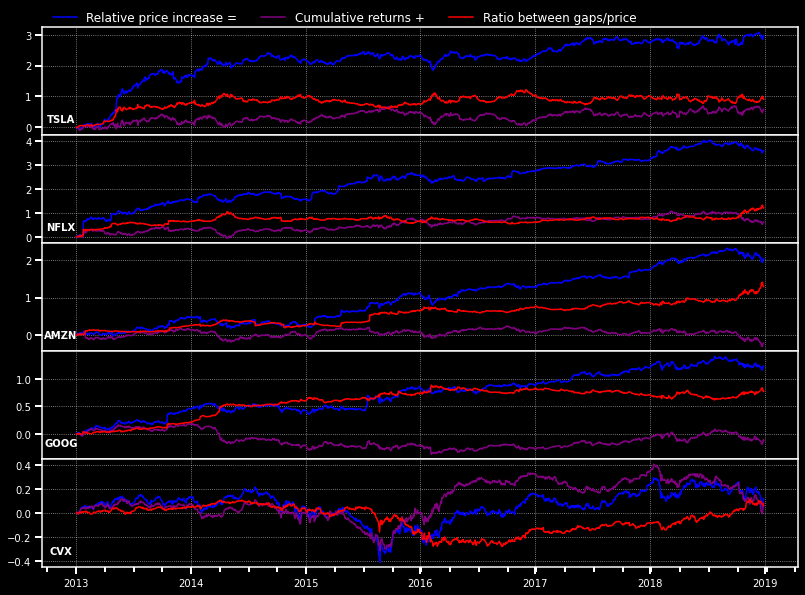

In [68]:
# Set properties for figure (graph container)
Figure_5 = matplotlib.pyplot.figure()
Figure_5.set_figheight(val = 10) # Inches
plots = {"Rel.incs": "Relative price increase =", "Returns": "Cumulative returns +", "Gaps": "Ratio between gaps/price"}

# Plot each stock in its own axes.
for n, stock in enumerate(stocks[::-1], 1):
    ax = Figure_5.add_axes([0.2, 0.05 + 0.15*n, 0.7, 0.15], zorder = len(stocks) - n)
    ax.set_xlabel(color = "w", fontweight = "bold", xlabel = stock)
    ax.xaxis.set_label_coords(0.025, 0.2)   # y-axis name position.
    # Plot corresponding graphs for each downloaded stock data.
    for i, plot in enumerate(plots.keys(), 0):
        x, y = Data_5[stock][["Date", plot]].values.T
        close = Data_5[stock]["Close"] if (i == 2) else 1
        ax.plot(x, y/close, color = (i/2, 0, 1 - i/2), label = plots[plot])

ax.legend(loc = "upper left", ncol = 3, bbox_to_anchor = (0, 5/4), fontsize = 12)
matplotlib.pyplot.pause(1e-13)

See how when the red "Gap" lines are too high, the purple "Returns'" curve decreases. The opposite can also happen, such as in "``CVX``" between 2016 and 2018: Gaps may generate profit when prices open below the previous day's close.

<u>**Hit ratios**</u>

To end with, we shall compare hit ratios as asked. As a long trade is entered every day, the common denominator for the 5 stocks is the same: "$T = 1509$" days. Therefore, the hit ratio (expressed as decimal number) is enough to define the amount of winning or losing days.

In [69]:
# Create series with one row per stock.
HR = pandas.Series(index = stocks, name = "Hit Ratio", dtype = "float64")
for stock in stocks: HR[stock] = (Data_5[stock]["Profit"] > 0).sum()/len(Data_5[stock])
print(f"Hit ratios of daily buy-and-hold strategy in selected stocks:\n{HR.round(4)}")

Hit ratios of daily buy-and-hold strategy in selected stocks:
TSLA    0.4944
NFLX    0.4877
AMZN    0.4970
GOOG    0.4964
CVX     0.4858
Name: Hit Ratio, dtype: float64
